##Mount Google Drive 
Upload the datasets to Google Drive so that you don't have to upload it again and again in Google Colab.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Importing Packages 

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

###Reading training data (csv file)

In [0]:
df = pd.read_csv('drive/My Drive/Datasets/Loan_Prediction_dataset/train_loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Analyzing Data 

In [5]:
# Shape of the dataset 
df.shape

(614, 13)

In [6]:
# Information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
# Number of null values in each column 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now we have to fill these null values with appropriate values so that they does not create any problem during training of the model.

In [0]:
columns_with_null = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Most of the customers are male so we will fill the null values in gender with value "Male"

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Most of the customers are married so we will fill the null values in Married column with value "Yes"

In [11]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Most of the customers have zero dependents so we will fill the null values in Dependents column with value "0".

In [12]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Most of the customers are not self employed so we will fill the null values in Self_Employed column with value "No".

In [13]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

For this we will take the average of the first 10 observations.

In [14]:
# Converting the Series into DataFrame 

LM = df['LoanAmount'].value_counts().to_frame()

LM = LM.reset_index()     # Reseting index 

LM.columns = ['LoanAmount', 'Frequency']

LM = LM.iloc[0:10]        # Selecting only first 10 rows of the dataframe 

LM

,LoanAmount,Frequency
0,120.0,20
1,110.0,17
2,100.0,15
3,187.0,12
4,160.0,12
5,128.0,11
6,113.0,11
7,130.0,10
8,96.0,9
9,95.0,9


In [15]:
# Calculating Average 

loan_amount = list(LM['LoanAmount'])
frequency = list(LM['Frequency'])


# Total Amount 
total = []

for i,j in zip(loan_amount,frequency):
  total.append(i*j)
  
# Average 
avg = sum(total)/sum(frequency)
avg

123.84126984126983

The Average of the first 10 obseravtions is 123.84 ,so we will fill the null values in column LoanAmount with value "124".

In [16]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Most of the customers have 360.0 loan amount term so we will fill the null values in column Loan_Amount_Term with value "360.0".

In [17]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Most of the customers have credit history so we will fill the null values in column Loan_Amount_Term with value "1.0".

### Filling the null Values

In [0]:
values={'Gender':'Male','Married':'Yes','Dependents':0,'Self_Employed':'No','LoanAmount':124,'Loan_Amount_Term':360.0,'Credit_History':1.0}

df.fillna(values,inplace=True)

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [21]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.609121,84.140818,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


## Separating Features and Labels 


In [22]:
# Features 
x = df.drop('Loan_Status',axis=1)
x = x.drop('Loan_ID', axis=1)  # droping load_id as it is not useful in training 

# Labels
y = df['Loan_Status']

print(x.shape)
print(y.shape)

(614, 11)
(614,)


We cannot use the categorical data directlt as it is in the form of strings , we have to convert the categorical data to use it in training the model. We will use pandas get_dummies function to do this.

In [23]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)

print(x.shape)
print(y.shape)

(614, 15)
(614, 1)


In [24]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,124.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1


In [0]:
y= y['Y'].ravel()

In [153]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

## Analyzing data using plots 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9745e0e10>,
      dtype=object)

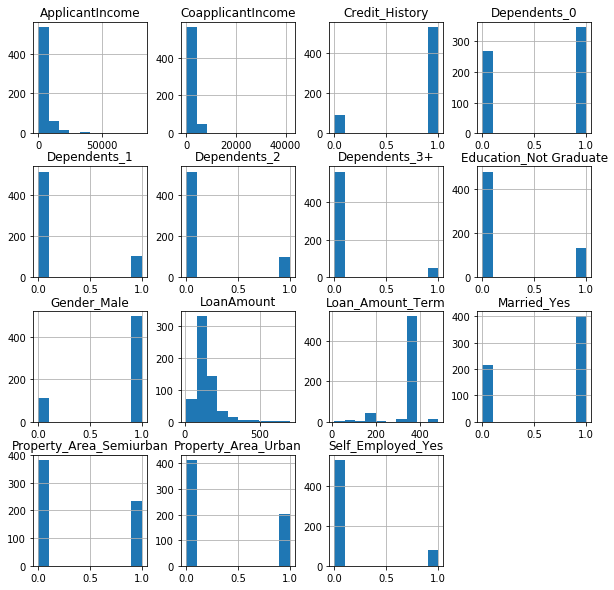

In [26]:
# Histogram 

x.hist(column = x.columns , figsize = (10,10))

In [27]:
df1 = df.drop('Loan_ID',axis=1)
df1=pd.get_dummies(df1,drop_first=True)

df1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [0]:
# sns.set(style='whitegrid',color_codes=True)
# sns.pairplot(df1,hue='Loan_Status_Y',vars=df1.columns[:-1])

## Dividing the data into training and testing data 

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test = train_test_split(x, y, random_state=0, shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(460, 15)
(154, 15)
(460,)
(154,)


## Logistic Regression 

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(random_state=10 )

# Training(fitting) the model 
model.fit(x_train,y_train)

# Accuracy of the Model 
accuracy = model.score(x_test,y_test)
print('Accuracy on test data is :',accuracy)

f1 = f1_score(model.predict(x_test), y_test)
print('F1-Score on test data is :',f1)

Accuracy on test data is : 0.8376623376623377
F1-Score on test data is : 0.897119341563786


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree Classifier 

In [150]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=25, min_samples_split=20, min_samples_leaf = 10)

# Training(fitting) the model 
model.fit(x_train,y_train)

# Accuracy of the Model 
accuracy = model.score(x_test,y_test)
print('Accuracy on test data is :',accuracy)

f1 = f1_score(model.predict(x_test), y_test)
print('F1-Score on test data is :',f1)

Accuracy on test data is : 0.7727272727272727
F1-Score on test data is : 0.8458149779735683


## Random Forest Classifier 

In [151]:
from sklearn.ensemble  import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=40, n_estimators=35, min_samples_split=35, min_samples_leaf=10)

# Training(fitting) the model 
model.fit(x_train,y_train)

# Accuracy of the Model 
accuracy = model.score(x_test,y_test)
print('Accuracy on test data is :',accuracy)

f1 = f1_score(model.predict(x_test), y_test)
print('F1-Score on test data is :',f1)

Accuracy on test data is : 0.8311688311688312
F1-Score on test data is : 0.8934426229508197


## Naive Bayes Classifier 

In [152]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Training(fitting) the model 
model.fit(x_train,y_train)

# Accuracy of the Model 
accuracy = model.score(x_test,y_test)
print('Accuracy on test data is :',accuracy)

f1 = f1_score(model.predict(x_test), y_test)
print('F1-Score on test data is :',f1)



Accuracy on test data is : 0.8246753246753247
F1-Score on test data is : 0.8879668049792531


###The Performance of the Classifier can be improved by trying different hyperparameters. After trying different hyperparameters we can choose the one whih gives the best results.